In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Memuat dataset dari URL GitHub
url = "https://raw.githubusercontent.com/fajaradhitiapratama/Siscer-Train-Dataset/main/WineQT.csv"
data = pd.read_csv(url)

In [13]:
# Menampilkan beberapa baris dari dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

<ipython-input-14-5f9036946fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


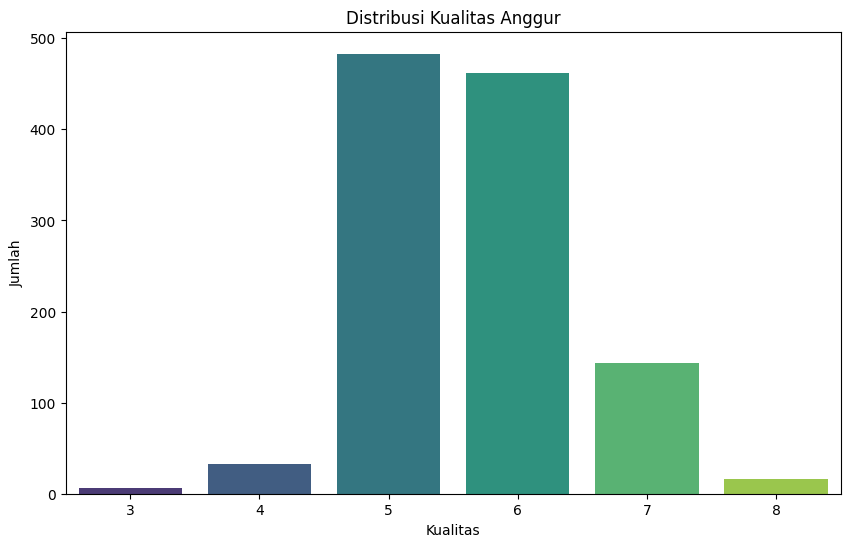

In [14]:
# Visualisasi distribusi kualitas anggur
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribusi Kualitas Anggur')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

In [15]:
# Memisahkan fitur dan target
X = data.drop("quality", axis=1)
y = data["quality"]

In [16]:
# Binarisasi target untuk klasifikasi biner (misalnya, kualitas >= 7 dianggap 'bagus', lainnya 'buruk')
y = (y >= 7).astype(int)

In [17]:
# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Inisialisasi dan pelatihan model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
# Memprediksi hasil
y_pred = model.predict(X_test)

In [23]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
# Menampilkan hasil metrik evaluasi
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Akurasi: 0.88
Presisi: 0.53
Recall: 0.29
F1 Score: 0.37


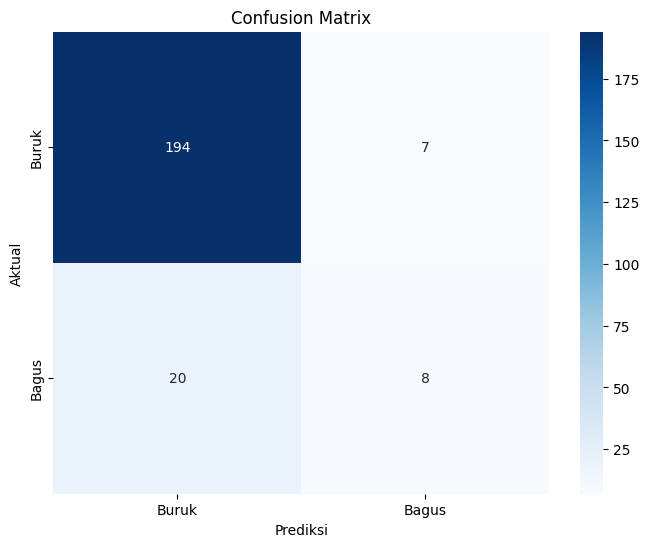

In [25]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Buruk', 'Bagus'], yticklabels=['Buruk', 'Bagus'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()